In [1]:
import sys
sys.path.append("/home/jhernandez/python_scripts/")

In [2]:
import xarray as xr
import numpy as np
import tools
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from datetime import datetime 
from datetime import timedelta

import scipy.interpolate as interp

scrip.so not found. Remapping function will not be available


In [3]:
import tools

## Comparison between OSE and OSSE observations Datasets

The objective is to compare datasets of both kind of experiments and to validate the synthetic observations created for the OSSE experiment.

OSSE observations have been created from a Nature Run (NR) model which is considered to be the real ocean state. We want here to check that this fields and observations follow a similar distribution so that bthe synthetic observations can be considered appropiatte for the purposes of the experiment

#### Date and experiment  selection  

In [6]:
date = datetime(2014,9,20)
strdate = date.strftime('%Y%m%d')

#### Load observatiosn and innovations DataFrames

In [32]:
# Load OSE Observations + Innovations
path = '/DATA/jhernandez/WMOP_ASSIM/Outputs/HFR_all_nonudging_Oct2014_v3/{0}/'.format( strdate)
inn_file = glob(path + 'inn*')[0]
obs_file = glob(path + 'obs*')[0]

df1 = tools.get_innovations(inn_file, obs_file)

# Load OSSE  v2 Observations + Innovations
path = '/DATA/jhernandez/WMOP_ASSIM/Outputs/HFR_all_actual_nonudging_Oct2014_OSSE_v2/{0}/'.format( strdate)
inn_file = glob(path + 'inn*')[0]
obs_file = glob(path + 'obs*')[0]

df2 = tools.get_innovations(inn_file, obs_file)

# Load OSSE  v1 Observations + Innovations
path = '/DATA/jhernandez/WMOP_ASSIM/Outputs/HFR_all_actual_nonudging_Oct2014_OSSE/{0}/'.format( strdate)
inn_file = glob(path + 'inn*')[0]
obs_file = glob(path + 'obs*')[0]

df3 = tools.get_innovations(inn_file, obs_file)

## SST

#### Comparative Histogram of Observations

The objective is to check that real observations and synthetic ones follow a similar distribution and that mean and standard desviation are similar in both datasets

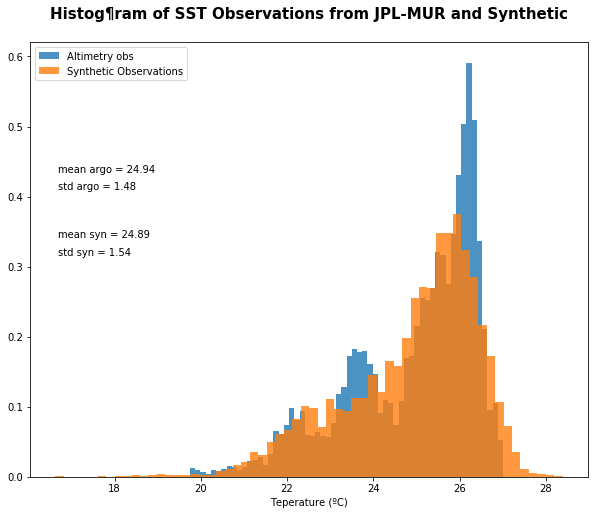

In [8]:
id1 = (df1['source']=='GHRSST_JPL')
id2 = (df2['source']=='GHRSST_JPL')

fig_salt_hist = plt.figure(figsize=(10,8))
ax = plt.subplot(111)

plt.hist(df1['obs_value'][id1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][id2], 60, density=True, alpha=0.8)

plt.legend(['Altimetry obs', 'Synthetic Observations'])
plt.title('Histog¶ram of SST Observations from JPL-MUR and Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('Teperature (ºC)')

plt.text(0.05, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][id1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][id1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][id2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][id2])), transform=ax.transAxes)


plt.show()

### Compare Maps

Maps should have a similar shape, however in the synthetic observations we have included an observation noise

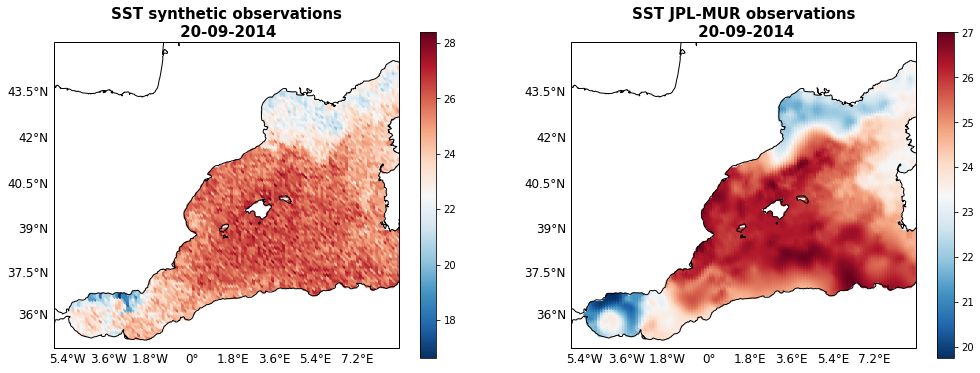

In [12]:
plt.figure(figsize=(17,6))
ax, gl = tools.make_map(continents=False, subplot_dim=121)

plt.scatter(df2['obs_lon'][id2], df2['obs_lat'][id2], 30, df2['obs_value'][id2], transform=gl.crs, cmap='RdBu_r')
plt.colorbar()
plt.title('SST synthetic observations\n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')

ax, gl = tools.make_map(continents=False, subplot_dim=122)

plt.scatter(df1['obs_lon'][id1], df1['obs_lat'][id1], 30, df1['obs_value'][id1], transform=gl.crs, cmap='RdBu_r')
plt.colorbar()
plt.title('SST JPL-MUR observations\n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')


plt.show()

## SLA

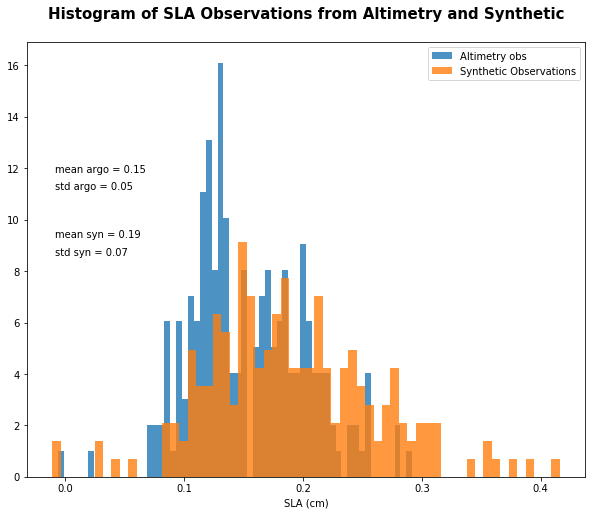

In [13]:
id1 = (df1['source']=='al')
id2 = (df2['source']=='al')

fig_salt_hist = plt.figure(figsize=(10,8))
ax = plt.subplot(111)

plt.hist(df1['obs_value'][id1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][id2], 60, density=True, alpha=0.8)

plt.legend(['Altimetry obs', 'Synthetic Observations'])
plt.title('Histogram of SLA Observations from Altimetry and Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('SLA (cm)')

plt.text(0.05, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][id1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][id1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][id2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][id2])), transform=ax.transAxes)


plt.show()

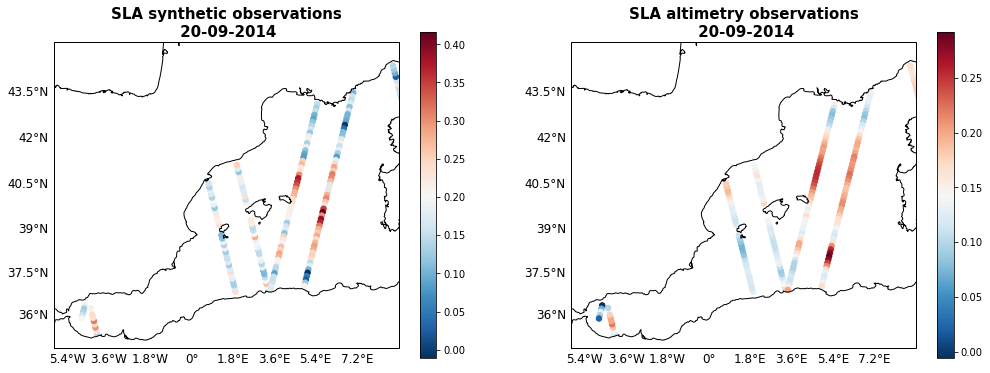

In [14]:

plt.figure(figsize=(17,6))
ax, gl = tools.make_map(continents=False, subplot_dim=121)

plt.scatter(df2['obs_lon'][id2], df2['obs_lat'][id2], 30, df2['obs_value'][id2], transform=gl.crs, cmap='RdBu_r')
plt.colorbar()
plt.title('SLA synthetic observations\n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')


ax, gl = tools.make_map(continents=False, subplot_dim=122)

plt.scatter(df1['obs_lon'][id1], df1['obs_lat'][id1], 30, df1['obs_value'][id1], transform=gl.crs, cmap='RdBu_r')
plt.colorbar()
plt.title('SLA altimetry observations\n {0}'.format(date.strftime('%d-%m-%Y')), fontsize=15, fontweight='bold')


plt.show()

## ARGO

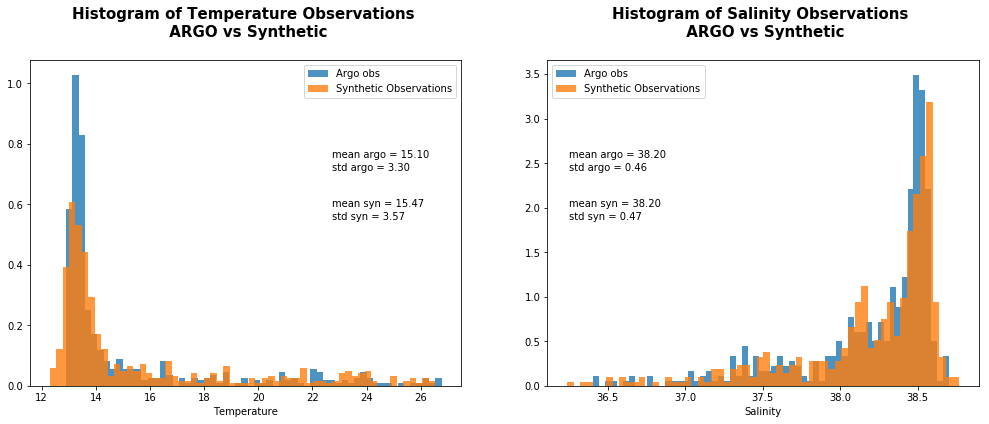

In [75]:
idt1 = ( (df1['source']=='ARGO') & (df1['nb_sou']==1) )
idt2= ( (df2['source']=='ARGO') & (df2['nb_sou']==1) )

ids1 = ( (df1['source']=='ARGO') & (df1['nb_sou']==2) )
ids2= ( (df2['source']=='ARGO') & (df2['nb_sou']==2) )

fig = plt.figure(figsize=(17,6))

ax = plt.subplot(121)

plt.hist(df1['obs_value'][idt1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][idt2], 60, density=True, alpha=0.8)

plt.legend(['Argo obs', 'Synthetic Observations'])
plt.title('Histogram of Temperature Observations \n ARGO vs Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('Temperature')

plt.text(0.7, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][idt1])), transform=ax.transAxes)
plt.text(0.7, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][idt1])), transform=ax.transAxes)

plt.text(0.7, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][idt2])), transform=ax.transAxes)
plt.text(0.7, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][idt2])), transform=ax.transAxes)


ax = plt.subplot(122)

plt.hist(df1['obs_value'][ids1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][ids2], 60, density=True, alpha=0.8)

plt.legend(['Argo obs', 'Synthetic Observations'])
plt.title('Histogram of Salinity Observations \n ARGO vs Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('Salinity')

plt.text(0.05, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][ids1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][ids1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][ids2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][ids2])), transform=ax.transAxes)


plt.show()

## HF radar

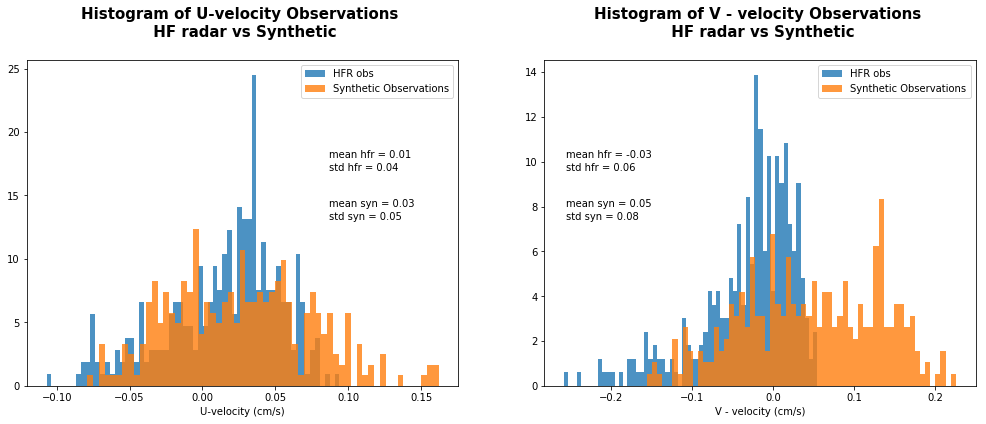

In [74]:
idu1 = (  (df1['nb_sou']==3) )
idu2= ( (df2['nb_sou']==3) )

idv1 = ( (df1['nb_sou']==4) )
idv2= ( (df2['nb_sou']==4) )

fig = plt.figure(figsize=(17,6))

ax = plt.subplot(121)

plt.hist(df1['obs_value'][idu1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][idu2], 60, density=True, alpha=0.8)

plt.legend(['HFR obs', 'Synthetic Observations'])
plt.title('Histogram of U-velocity Observations \n HF radar vs Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('U-velocity (cm/s)')

plt.text(0.7, 0.7, 'mean hfr = {0:0.2f}'.format(np.mean(df1['obs_value'][idu1])), transform=ax.transAxes)
plt.text(0.7, 0.66, 'std hfr = {0:0.2f}'.format(np.std(df1['obs_value'][idu1])), transform=ax.transAxes)

plt.text(0.7, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][idu2])), transform=ax.transAxes)
plt.text(0.7, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][idu2])), transform=ax.transAxes)


ax = plt.subplot(122)

plt.hist(df1['obs_value'][idv1], 60, density=True, alpha=0.8)
plt.hist(df2['obs_value'][idv2], 60, density=True, alpha=0.8)

plt.legend(['HFR obs', 'Synthetic Observations'])
plt.title('Histogram of V - velocity Observations \n HF radar vs Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('V - velocity (cm/s)')

plt.text(0.05, 0.7, 'mean hfr = {0:0.2f}'.format(np.mean(df1['obs_value'][idv1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std hfr = {0:0.2f}'.format(np.std(df1['obs_value'][idv1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][idv2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][idv2])), transform=ax.transAxes)


plt.show()

## Trying Seaborn Library for fancy plotting

In [20]:
# library & dataset
import seaborn as sns
 
idx2 = ( (df2['source']=='ARGO')  )
idt2 = ( (df2['source']=='ARGO') & (df2['nb_sou']==1) )
ids2 = ( (df2['source']=='ARGO') & (df2['nb_sou']==2) )

df_temp = df2[['obs_value','analysis', 'background']][idt2].reset_index(drop=True)
df_salt = df2[['obs_value','analysis', 'background']][ids2].reset_index(drop=True)
df_argo = df2[['obs_value','analysis', 'background']][idx2].reset_index(drop=True)


#### ARGO temperature

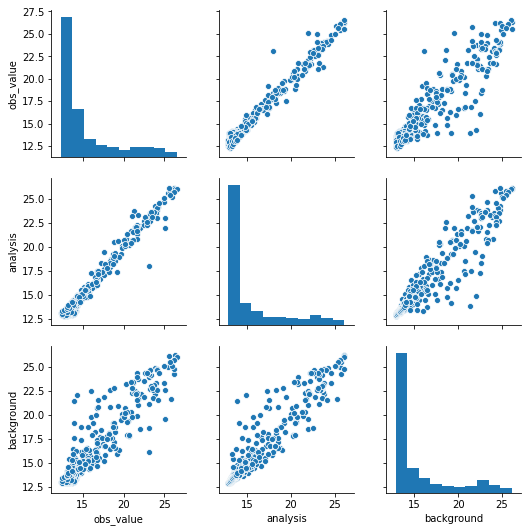

In [22]:
# Basic correlogram
sns.pairplot(df_temp)
plt.show()

In [85]:
dfx = sns.load_dataset('iris')


#### ARGO salinity

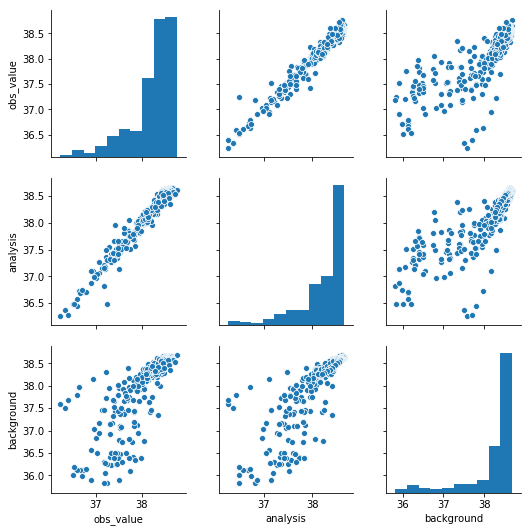

In [96]:
# Basic correlogram
sns.pairplot(df_salt)
plt.show()

#### HF radar

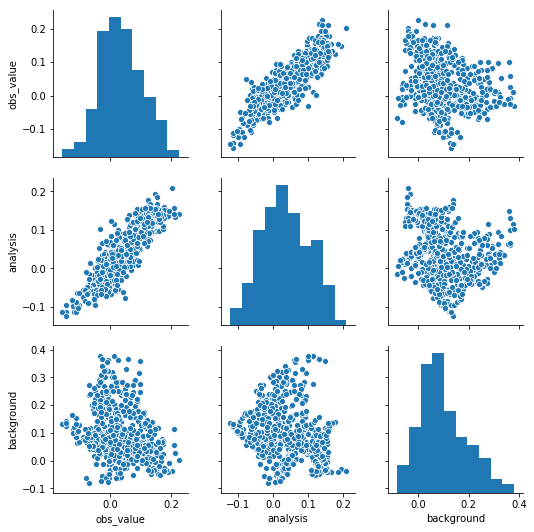

In [23]:
idx = ( (df2['source']=='HF_Radar')  )
df_hfr = df2[['obs_value','analysis', 'background']][idx].reset_index(drop=True)

# Basic correlogram
sns.pairplot(df_hfr)
plt.show()

In [130]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

#### HF radar U-velocity

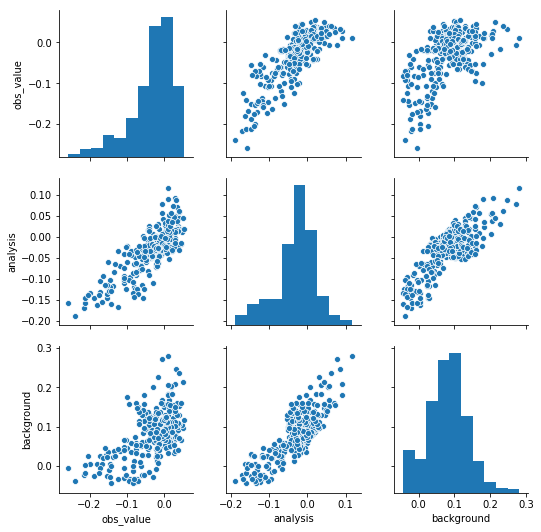

In [126]:
idu = ( (df1['source']=='HF_Radar') & (df1['nb_sou']==4 ) )
df_hfr = df1[['obs_value','analysis', 'background']][idu].reset_index(drop=True)



# Basic correlogram
aa = sns.pairplot(df_hfr)
plt.show()

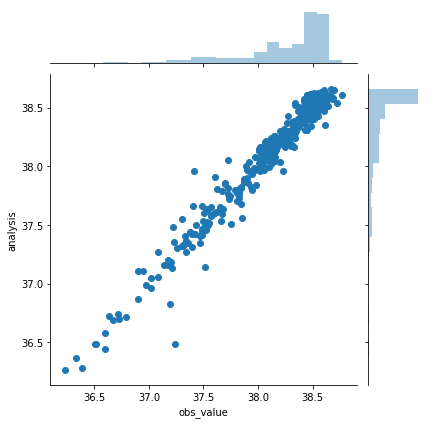

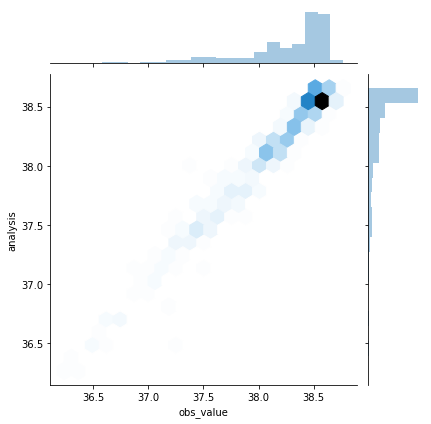

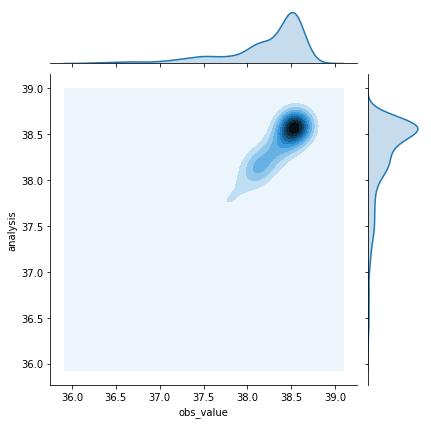

In [112]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df_salt["obs_value"], y=df_salt["analysis"], kind='scatter')
sns.jointplot(x=df_salt["obs_value"], y=df_salt["analysis"], kind='hex')
sns.jointplot(x=df_salt["obs_value"], y=df_salt["analysis"], kind='kde')

In [28]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## SLA distribution

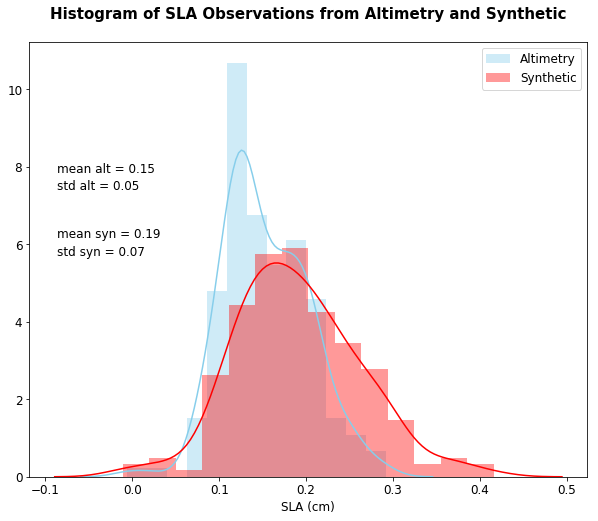

In [52]:

id1 = (df1['source']=='al')
id2 = (df2['source']=='al')
 

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)

# Make histogram and KDE
sns.distplot( df1["obs_value"][id1] , color="skyblue", label="Altimetry")
sns.distplot( df2["obs_value"][id2] , color="red", label="Synthetic")
plt.legend()
#plt.legend(['Altimetry obs', 'Synthetic Observations'])
plt.title('Histogram of SLA Observations from Altimetry and Synthetic\n', fontsize=15, fontweight='bold')
plt.xlabel('SLA (cm)')

# Text Mean and Std
plt.text(0.05, 0.7, 'mean alt = {0:0.2f}'.format(np.mean(df1['obs_value'][id1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std alt = {0:0.2f}'.format(np.std(df1['obs_value'][id1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][id2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][id2])), transform=ax.transAxes)


plt.show()


In [54]:
fig.savefig('/home/jhernandez/Escritorio/OSSE_v2/histogram_altimetry_observations.png', dpi=250)

### SST histogram and distribution

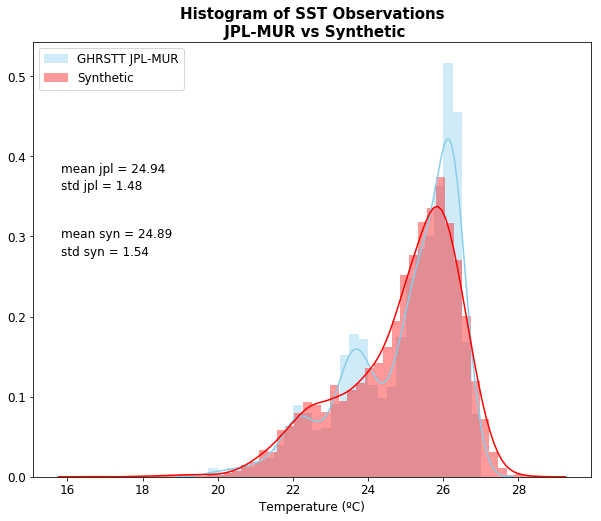

In [50]:

id1 = (df1['source']=='GHRSST_JPL')
id2 = (df2['source']=='GHRSST_JPL')
id3 = (df3['source']=='GHRSST_JPL')
 
# Method 1: on the same Axis
plt.figure(figsize=(10,8))

ax = plt.subplot(111)
# Plot histogram and distribution
sns.distplot( df1["obs_value"][id1] , color="skyblue", label="GHRSTT JPL-MUR")
sns.distplot( df2["obs_value"][id2] , color="red", label="Synthetic")
#sns.distplot( df3["obs_value"][id3] , color="olive", label="Synthetic v1")
plt.legend(['JPL-MUR', 'Synthetic'])
plt.xlabel('SLA (cm)')


plt.legend()
plt.title('Histogram of SST Observations\n JPL-MUR vs Synthetic', fontsize=15, fontweight='bold')
plt.xlabel('Temperature (ºC)')

# Text Mean and Std
plt.text(0.05, 0.7, 'mean jpl = {0:0.2f}'.format(np.mean(df1['obs_value'][id1])), transform=ax.transAxes)
plt.text(0.05, 0.66, 'std jpl = {0:0.2f}'.format(np.std(df1['obs_value'][id1])), transform=ax.transAxes)

plt.text(0.05, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][id2])), transform=ax.transAxes)
plt.text(0.05, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][id2])), transform=ax.transAxes)


plt.show()

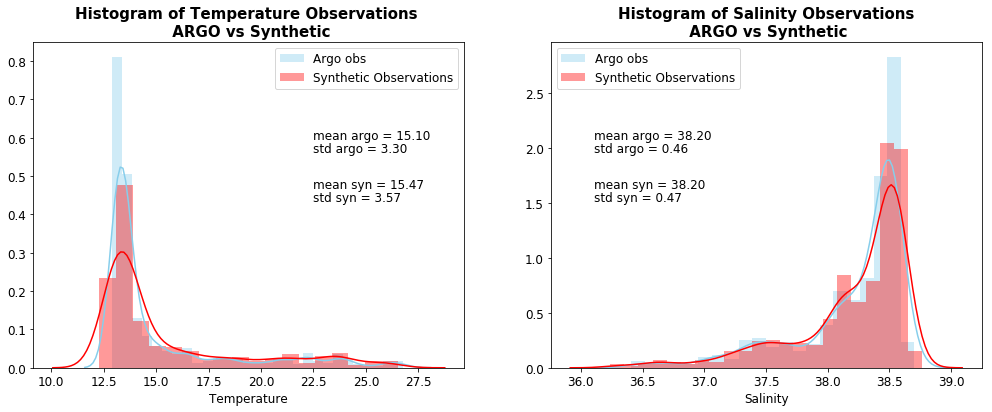

In [44]:
idt1 = ( (df1['source']=='ARGO') & (df1['nb_sou']==1) )
idt2= ( (df2['source']=='ARGO') & (df2['nb_sou']==1) )

ids1 = ( (df1['source']=='ARGO') & (df1['nb_sou']==2) )
ids2= ( (df2['source']=='ARGO') & (df2['nb_sou']==2) )

fig = plt.figure(figsize=(17,6))

ax = plt.subplot(121)

sns.distplot( df1["obs_value"][idt1] , color="skyblue", label="Argo")
sns.distplot( df2["obs_value"][idt2] , color="red", label="Synthetic")

plt.legend(['Argo obs', 'Synthetic Observations'])
plt.title('Histogram of Temperature Observations \n ARGO vs Synthetic', fontsize=15, fontweight='bold')
plt.xlabel('Temperature')

plt.text(0.65, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][idt1])), transform=ax.transAxes)
plt.text(0.65, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][idt1])), transform=ax.transAxes)

plt.text(0.65, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][idt2])), transform=ax.transAxes)
plt.text(0.65, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][idt2])), transform=ax.transAxes)


ax = plt.subplot(122)

sns.distplot( df1["obs_value"][ids1] , color="skyblue", label="Argo")
sns.distplot( df2["obs_value"][ids2] , color="red", label="Synthetic")

plt.legend(['Argo obs', 'Synthetic Observations'])
plt.title('Histogram of Salinity Observations\n ARGO vs Synthetic', fontsize=15, fontweight='bold')
plt.xlabel('Salinity')

plt.text(0.1, 0.7, 'mean argo = {0:0.2f}'.format(np.mean(df1['obs_value'][ids1])), transform=ax.transAxes)
plt.text(0.1, 0.66, 'std argo = {0:0.2f}'.format(np.std(df1['obs_value'][ids1])), transform=ax.transAxes)

plt.text(0.1, 0.55, 'mean syn = {0:0.2f}'.format(np.mean(df2['obs_value'][ids2])), transform=ax.transAxes)
plt.text(0.1, 0.51, 'std syn = {0:0.2f}'.format(np.std(df2['obs_value'][ids2])), transform=ax.transAxes)


plt.show()

In [127]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

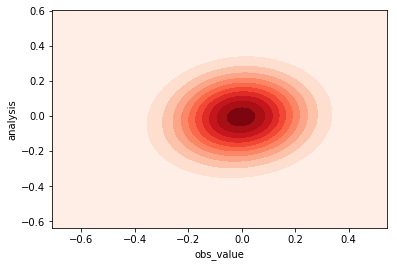

In [129]:
id1 = (df1['source']=='HF_Radar')
id2 = (df2['source']=='HF_Radar')

# Custom it with the same argument as 1D density plot
sns.kdeplot(df1['obs_value'][id1], df1['analysis'][id1], cmap="Reds", shade=True, bw=.15)